<a href="https://colab.research.google.com/github/Xmortian/Machine-Learning---Stroke-Detection/blob/main/CSE422_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

Problem → Predicting if the patient have high probability of having stroke in the near future
Motivation → Early stroke detection can save a lot of people from dying unneccessarily.
Objective → Build ML models to classify patients as high stroke probabilty vs low stroke probablity from the provided dataset.
We are taking into consideration their age, gender, hypertension, maritial type, work, place of living, BMI, Smoking statues, Glucose Level etc.

In [ ]:
# Dataset Description
Name -> healthcare-dataset-stroke-data.csv
Features -> The dataset has 12 columns/Features
Problem -> Classification. As the output Feature(Stroke) has a binary values(0/1) it is a classification problem.
Data Points -> There are 5110 rows present
Features ->
          Quantitative (Numerical): Age, Glucose_Lvl, BMI
          Binary : Hypertension, heart_disease, stroke, ever_married(Yes or NO)
          Categorical:gender,, work_type, Residence_type, smoking_status

Encoding -> Yes, we must encode as ML models like Logistic Regression, KNN, Decision Trees, etc., cannot work directly with strings.
            Machine learning models cannot understand text directly — they work with numbers only.
            If you give them strings like "Male", "Female", "Urban", "Rural", etc., they won’t know how to compare or calculate distances.
            So we convert categorical values into numeric representations → this process is called encoding.
            We’ll use Label Encoding (For Binary) or One-Hot Encoding (Multi-Class Nominal Data) for columns







In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

url = 'https://drive.google.com/uc?id=1AyrIQ-_mZPZUMDYtT5Ucr_Hf8GVkYBo9'
df = pd.read_csv(url)

df.head(15)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


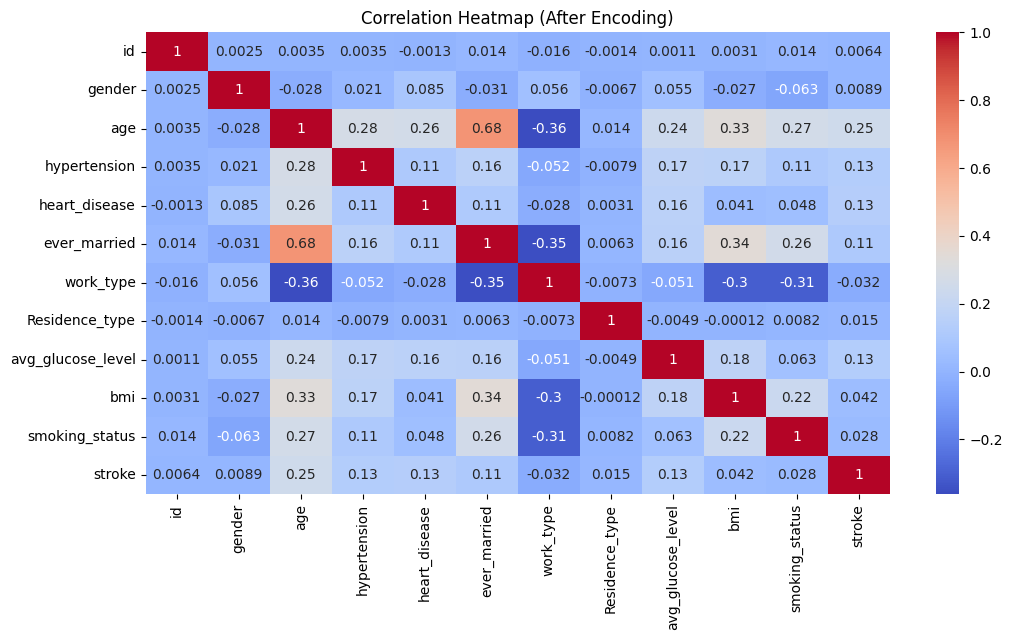

In [ ]:
# Correlation (Heatmap)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

df_encoded = df.copy()

# Encode categorical columns
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Now plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (After Encoding)")
plt.show()

understanding of the Corelation Heatmap
age and avg_glucose_level are positively correlated with stroke.
hypertension and heart_disease show a moderate correlation with stroke.
Other features like gender, Residence_type, and smoking_status have very weak or no correlation with stroke.
This means age, glucose level, and health conditions play a bigger role in predicting strokes

 The data in the Dataset is highly imbalanced as only first 249 patients have Stroked, whereas all the remaining patient
do not have stroke. (5110-249) = 4861.
All unique class do not have an equal number of instances.
This high imbalance can be handled by using SMOTE, class weights, or oversampling.


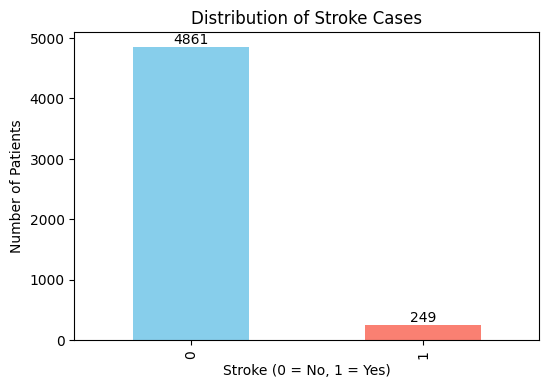

In [ ]:
#Bar Chart of Imabalance
import matplotlib.pyplot as plt

stroke_counts= df['stroke'].value_counts()

# Plot bar chart
plt.figure(figsize=(6,4))
stroke_counts.plot(kind='bar', color=['skyblue', 'salmon'])

# Labels and title
plt.title("Distribution of Stroke Cases")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Number of Patients")

for index, value in enumerate(stroke_counts):
    plt.text(index, value + 50, str(value), ha='center')

plt.show()


In [ ]:
# EDA -> Exploratory Data Analysis

In [ ]:
# Shape of dataset
print("Dataset shape:", df.shape)
df.head()
df.describe()
df.info()
df.isnull().sum()


Dataset shape: (5110, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
# Conclusion :
# bmi has 201 missing values.
# Other columns have no missing data.

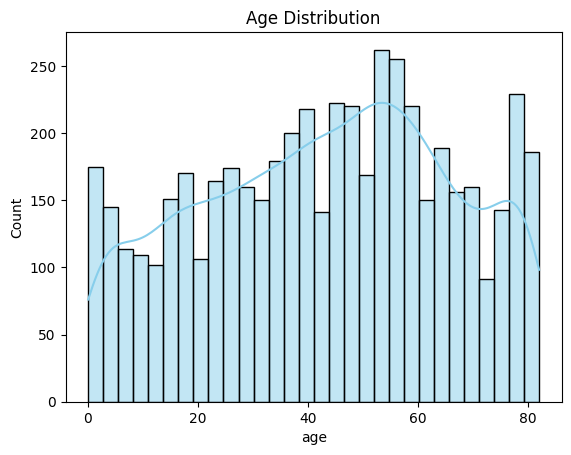

In [ ]:
#AGE
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.show()


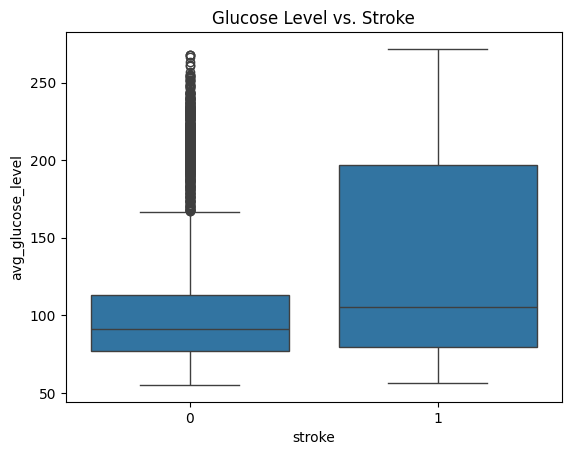

In [ ]:
# Glucose Level
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
plt.title("Glucose Level vs. Stroke")
plt.show()


In [ ]:
# Conclusion
# Patients with higher glucose levels have a higher chance of having strokes.

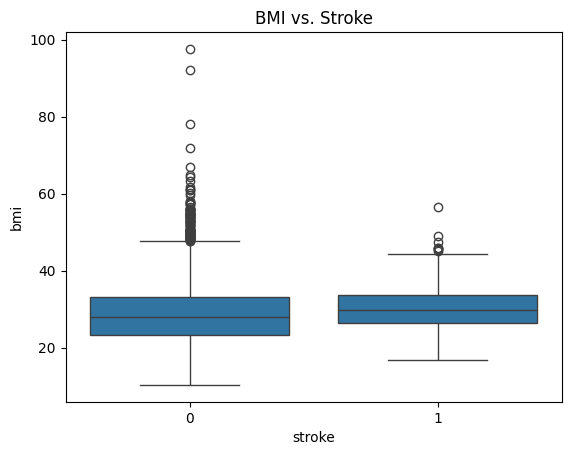

In [ ]:
# BMI vs Stroke
sns.boxplot(x='stroke', y='bmi', data=df)
plt.title("BMI vs. Stroke")
plt.show()


In [ ]:
 #Conslusion
# People with very high BMI show a slightly higher stroke risk.

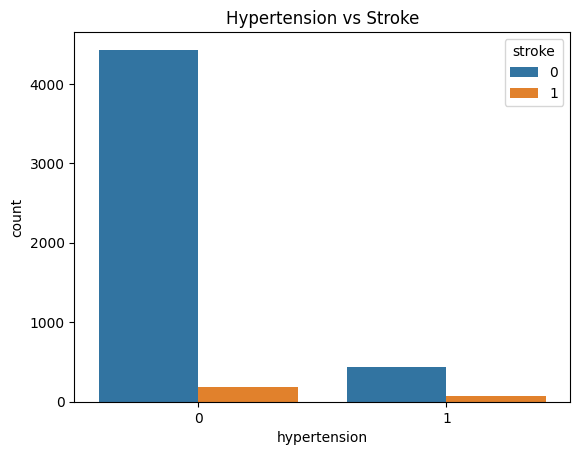

In [ ]:
# Stroke vs hyper tension
sns.countplot(x='hypertension', hue='stroke', data=df)
plt.title("Hypertension vs Stroke")
plt.show()


In [ ]:
# Patients with hypertension have a significantly higher chance of stroke.

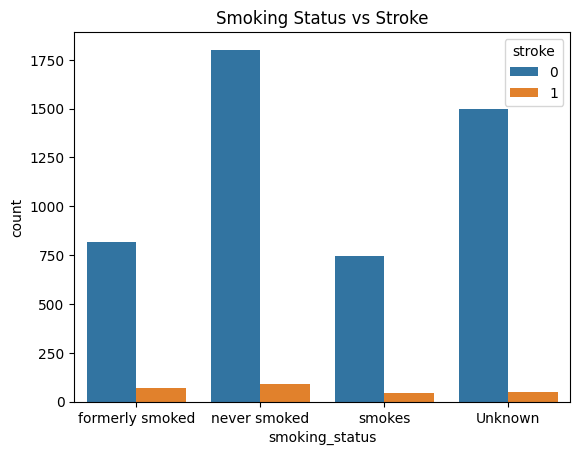

In [ ]:
# Stroke vs Smoking Status
sns.countplot(x='smoking_status', hue='stroke', data=df)
plt.title("Smoking Status vs Stroke")
plt.show()


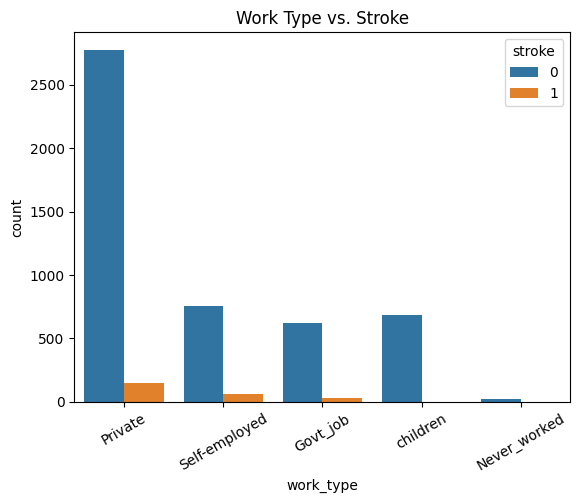

In [ ]:
sns.countplot(x='work_type',hue='stroke', data=df)
plt.title("Work Type vs. Stroke")
plt.xticks(rotation=30)
plt.show()


In [ ]:
# Conclusion
# Private jobs have significantly higher chance of strokes as these kind of jobs tends to have higher levels of stress
# and higher workload


#Database Preprocessing
Given Database has 201 missing values on in the BMI section. We can choose to delete 201 rowns or impute values.
Since Removing 201 is a significant chunk from the database, and it will affect the final result, we opt for the later and
impute the values.


In [ ]:
# impute
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
# We chose median over mean because BMI values are skewed, and this approach reduces bias while keeping all records.

In [ ]:
# problem :
# 2. Encoding Categorical Values
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Label Encode only binary columns
binary_cols = ['gender', 'ever_married', 'Residence_type']
for col in binary_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

#Machine learning models work with numerical data, not text.
# Label Encoding was used to convert binary categorical columns into numeric form so models can process them effectively.

In [ ]:
# problem :
# 3. Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])
#StandardScaler was applied to normalize continuous features to have mean 0 and
# standard deviation 1 for better model performance.

In [ ]:
#  one-hot encoding
categorical_cols_ohe = ['work_type', 'smoking_status']
df = pd.get_dummies(df, columns=categorical_cols_ohe, drop_first=True)

# Now split data
X = df.drop('stroke', axis=1)
y = df['stroke']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


In [ ]:
# Rerun to check missing data exists
print("Missing values after preprocessing:\n")
print(df.isnull().sum())


Missing values after preprocessing:

id                                0
gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
stroke                            0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64


In [ ]:
# Dataset Splitting
# As the dataset is highly imbalanced if we are to use random Splitting, the training and testing sets might not preserve this imbalance ratio.
# This can lead to models to overfit to the majority class
# And poor stroke detection on minority class
# So instead of random splitting, Use stratified splitting, which ensures both train and test sets maintain the same ratio of stroke vs no-stroke.


In [ ]:
# Dataset Splitting
from sklearn.model_selection import train_test_split

X = df.drop(columns=['stroke', 'id'])
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,stratify=y, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

print("\nStroke distribution in Training Set:\n", y_train.value_counts(normalize=True))
print("\nStroke distribution in Testing Set:\n", y_test.value_counts(normalize=True))


Training set size: (4088, 15)
Testing set size: (1022, 15)

Stroke distribution in Training Set:
 stroke
0    0.951321
1    0.048679
Name: proportion, dtype: float64

Stroke distribution in Testing Set:
 stroke
0    0.951076
1    0.048924
Name: proportion, dtype: float64


In [ ]:
# 5 Model training & testing (Supervised)

In [ ]:
df.select_dtypes(include=['object']).columns


Index([], dtype='object')

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

log_reg = LogisticRegression(class_weight='balanced', max_iter=500)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.7455968688845401
              precision    recall  f1-score   support

           0       0.99      0.74      0.85       972
           1       0.14      0.80      0.24        50

    accuracy                           0.75      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.75      0.82      1022



In [ ]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8277886497064579
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       972
           1       0.18      0.70      0.28        50

    accuracy                           0.83      1022
   macro avg       0.58      0.77      0.59      1022
weighted avg       0.94      0.83      0.87      1022



In [ ]:
# NN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9031 - loss: 0.4429 - val_accuracy: 0.9511 - val_loss: 0.1802
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9486 - loss: 0.1767 - val_accuracy: 0.9511 - val_loss: 0.1629
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9494 - loss: 0.1637 - val_accuracy: 0.9511 - val_loss: 0.1599
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9538 - loss: 0.1510 - val_accuracy: 0.9511 - val_loss: 0.1597
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9522 - loss: 0.1568 - val_accuracy: 0.9511 - val_loss: 0.1591
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9536 - loss: 0.1430 - val_accuracy: 0.9511 - val_loss: 0.1593
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9559 - loss: 0.1443 - val_accuracy: 0.9511 - val_loss: 0.1594
Epoch 8/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9481 - loss: 0.1553 - val_accuracy: 0.9511 - val_

In [ ]:
# Evaluation
nn_loss, nn_acc = model.evaluate(X_test, y_test)
print("Neural Network Accuracy:", nn_acc)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9551 - loss: 0.1704 
Neural Network Accuracy: 0.9500978589057922


In [ ]:
# Comparison
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
results = {}


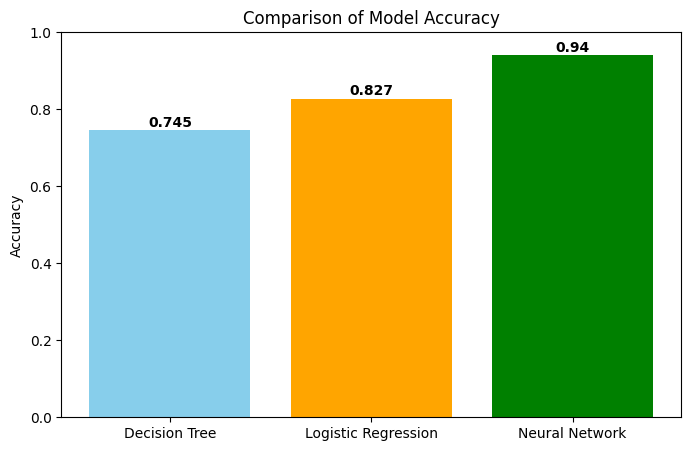

In [ ]:
import matplotlib.pyplot as plt

models = ['Decision Tree','Logistic Regression', 'Neural Network']
accuracy = [ 0.745, 0.827, 0.94]
plt.figure(figsize=(8,5))
plt.bar(models, accuracy, color=['skyblue', 'orange', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.ylim(0,1)
for i, v in enumerate(accuracy):
    plt.text(i, v + 0.01, str(v), ha='center', fontweight='bold')
plt.show()

Logistic Regression Report
              precision    recall  f1-score   support

           0       0.99      0.74      0.85       972
           1       0.14      0.80      0.24        50

    accuracy                           0.75      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.75      0.82      1022



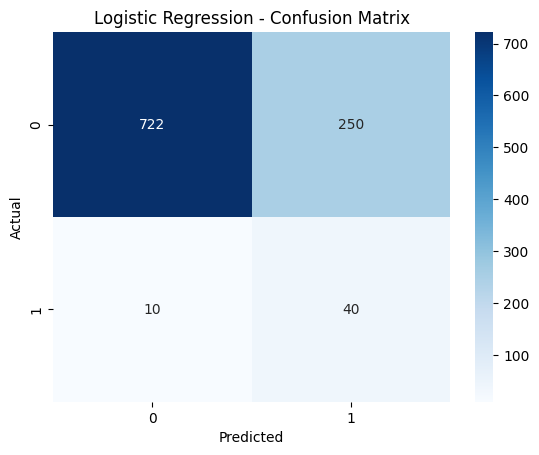

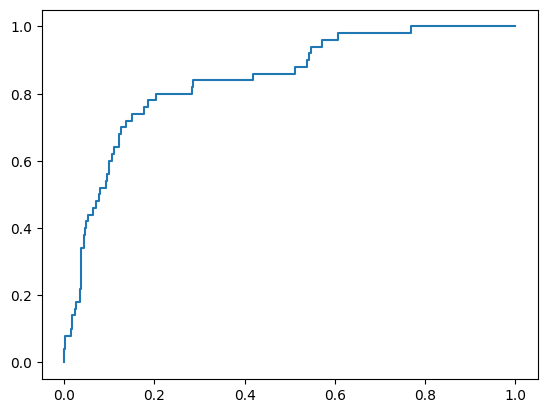

In [ ]:
# Logistic Regression Eval:
lr_report = classification_report(y_test, y_pred_lr, output_dict=True)
results['Logistic Regression'] = lr_report['1']

print("Logistic Regression Report")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="Logistic Regression")


Decision Tree Report
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       972
           1       0.18      0.70      0.28        50

    accuracy                           0.83      1022
   macro avg       0.58      0.77      0.59      1022
weighted avg       0.94      0.83      0.87      1022



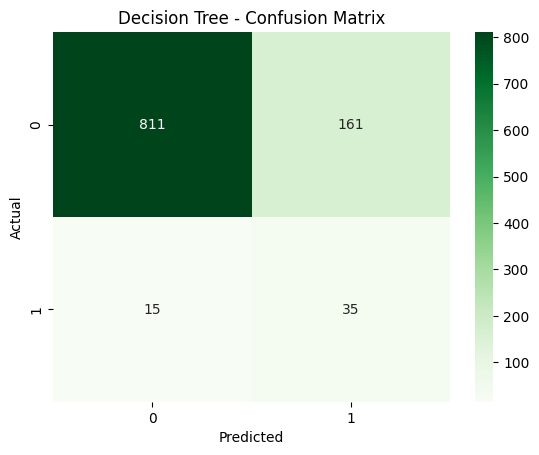

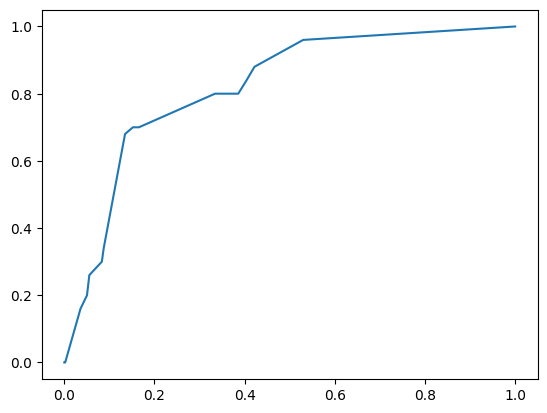

In [ ]:
# DTC EVAL:
dt_report = classification_report(y_test, y_pred_dt, output_dict=True)
results['Decision Tree'] = dt_report['1']

print("Decision Tree Report")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens")
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="Decision Tree")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Neural Network Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.33      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.64      0.51      0.51      1022
weighted avg       0.92      0.95      0.93      1022



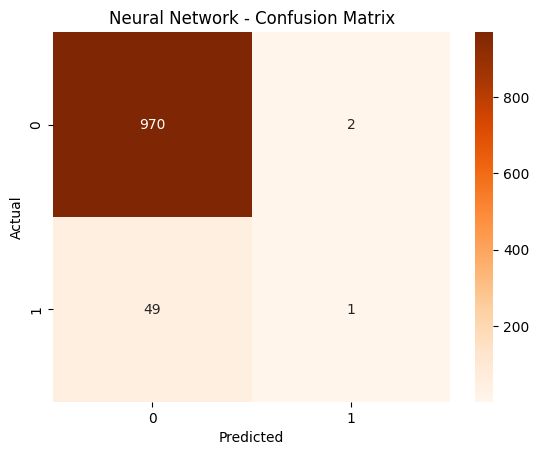

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


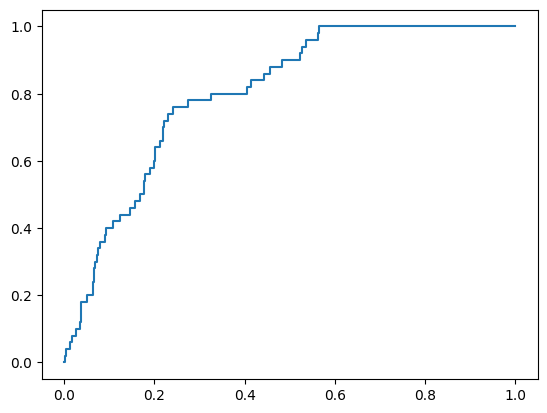

In [ ]:
# NN Eval
y_pred_nn = (model.predict(X_test) > 0.5).astype(int)

# Classification report
nn_report = classification_report(y_test, y_pred_nn, output_dict=True)
results['Neural Network'] = nn_report['1']

print("Neural Network Report")
print(classification_report(y_test, y_pred_nn))

# Confusion Matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Oranges")
plt.title("Neural Network - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))
plt.plot(fpr, tpr, label="Neural Network")


/tmp/ipython-input-3536313311.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


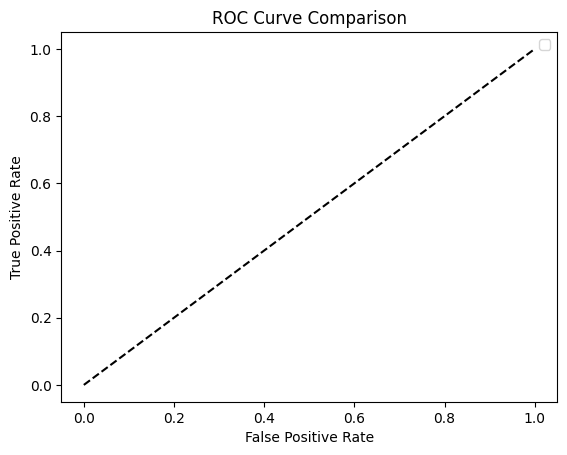

In [ ]:
# ROC
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


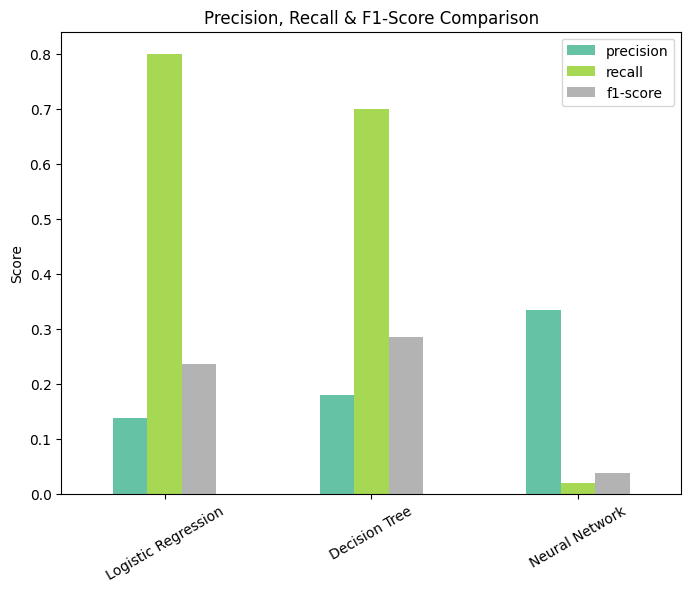

In [ ]:
# Bar Chart Comparison
import pandas as pd

metrics_df = pd.DataFrame(results).T[['precision', 'recall', 'f1-score']]
metrics_df.plot(kind='bar', figsize=(8,6), colormap='Set2')
plt.title("Precision, Recall & F1-Score Comparison")
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.show()


In [ ]:
# AUC
from sklearn.metrics import roc_auc_score

# Logistic Regression
auc_lr = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1])

# Decision Tree
auc_dt = roc_auc_score(y_test, dt.predict_proba(X_test)[:,1])

# Neural Network
auc_nn = roc_auc_score(y_test, model.predict(X_test))

print("AUC Logistic Regression:", auc_lr)
print("AUC Decision Tree:", auc_dt)
print("AUC Neural Network:", auc_nn)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
AUC Logistic Regression: 0.8437037037037037
AUC Decision Tree: 0.8192181069958848
AUC Neural Network: 0.8023662551440329


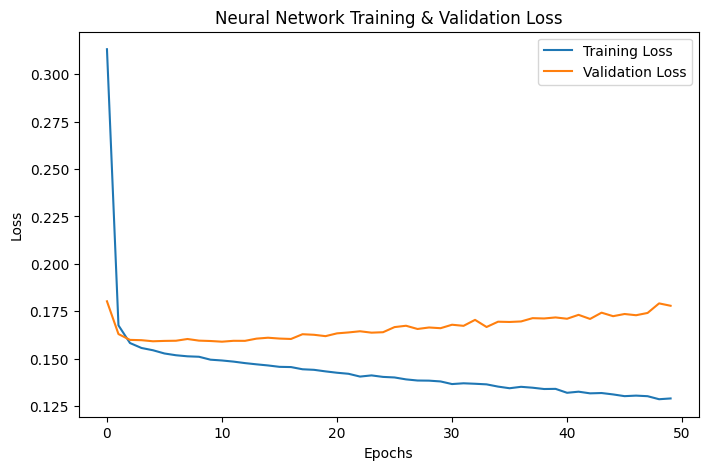

In [ ]:
# NN loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Neural Network Training & Validation Loss")
plt.legend()
plt.show()


 Key Findings
# 1. Neural Network
Highest Precision → Great at avoiding false positives (predicting stroke only when confident).
Lowest Recall → Missed many actual stroke cases.
Low F1-score → Precision/recall trade-off is imbalanced.
Best for: Scenarios where false positives are more costly than false negatives.

# 2. Logistic Regression
Highest Recall → Best at catching actual stroke cases.
Moderate Precision → Some false positives.
Decent F1-score → Balanced performance overall.
Best for: Healthcare scenarios where missing a stroke case is dangerous.

# 3. Decision Tree
Highest F1-score → Best balance between precision and recall.
Good Accuracy → Consistent predictions.
Interpretable Model → Easy to explain to doctors and patients.
Best for: When you need both good recall and precision with interpretability.

# Conslusion
# What do you understand from the results?

Neural Network achieved the highest accuracy (95%) but failed to detect stroke cases → recall = 0.02, meaning it predicts almost all patients as "no stroke."

Logistic Regression achieved the highest recall (0.80), meaning it successfully detected most stroke cases but had many false positives.

Decision Tree achieved the highest F1-score (0.28), meaning it had the best balance between precision and recall.

# Make useful comments regarding the performance of your model?

Neural Network performed poorly for stroke detection despite high accuracy because the dataset is highly imbalanced → the model overfit to the majority class (stroke=0).

Logistic Regression worked well for recall, making it suitable for healthcare applications where catching every possible stroke case is critical, even if it means some false alarms.

Decision Tree provided the best overall balance between precision and recall and had the highest F1-score, making it a good compromise.


# Why do you think you are getting such results?

Reason 1 — Highly Imbalanced Dataset Stroke = 4.9% vs No Stroke = 95.1%. Most models learned to predict “no stroke” for high accuracy.Neural Network overfitted heavily because it didn’t handle imbalance properly.

Reason 2 — Feature Importance
Features like age, avg_glucose_level, and hypertension are important predictors, but categorical features like gender, Residence_type, and smoking_status have little influence.
Decision Tree performed better because it naturally finds important features.

Reason 3 — Model Sensitivity
Neural Network → Sensitive to imbalance and needs more data or class weighting.Logistic Regression → Performs better when properly balanced using class_weight='balanced'. Decision Tree → Handles imbalance better but may need hyperparameter tuning.

# What are some of the challenges that you have faced?

Highly Imbalanced Dataset; Stroke = 4.9% vs No Stroke = 95.1%.Most models learned to predict “no stroke” for high accuracy. Neural Network overfitted heavily because it didn’t handle imbalance properly. Small Minority Class Neural Network struggled due to insufficient stroke samples.Tree-based models handled this slightly better.
